In [1]:
import icecube
from icecube import icetray, dataio
from I3Tray import I3Tray
from datetime import datetime
import json
import csv
import matplotlib.pyplot as plt
import numpy as np

In [2]:

class PlotMillipede(icetray.I3Module):

    def __init__(self,ctx):
        icetray.I3Module.__init__(self,ctx)
        
    def Configure(self):
        self.nframes = 30
        self.currentframe = 0
                              
        
    def Physics(self, frame):
        if frame["I3EventHeader"].sub_event_stream == "InIceSplit" and "MillipedeHighEnergy" in frame:
            energylosslist = []
            zpos = []
            minorid = []
            time = []
            energylosses = frame["MillipedeHighEnergy"]
            for p in energylosses:
                energylosslist.append(p.energy)
                zpos.append(p.pos.z)
                minorid.append(p.minor_id)
                time.append(p.time)
            print(frame["LLPInfo"])
            decayz = frame["LLPInfo"]["prod_z"] - frame["LLPInfo"]["length"]*np.cos(frame["LLPInfo"]["zenith"])
            prodz  = frame["LLPInfo"]["prod_z"]
            print("decay z =", decayz)
            #print("prod z =", prodz)
            ends = 3
            plt.figure()
            plt.title("ID " + "{0}/{1}".format(frame["I3EventHeader"].run_id, frame["I3EventHeader"].event_id) + " (zen, azi) = " + "{:.2f}".format(frame["LLPInfo"]["zenith"]*180.0/np.pi) + ", " + "{:.2f}".format(frame["LLPInfo"]["azimuth"]*180.0/np.pi) + " deg")
            plt.plot(zpos[ends:-ends], energylosslist[ends:-ends], label = "Millipede")
            plt.vlines([prodz, decayz], min(energylosslist[ends:-ends]), max(energylosslist[ends:-ends]), label = "Decay/Prodcution")
            plt.xlabel("z position (m)")
            plt.ylim([-10,500])
            plt.gca().invert_xaxis()
            plt.ylabel("Segment energy")
            plt.legend()
            plt.show()
            
            energylosslist = []
            zpos = []
            minorid = []
            time = []
            energylosses = frame["MillipedeLowEnergy"]
            for p in energylosses:
                energylosslist.append(p.energy)
                zpos.append(p.pos.z)
                minorid.append(p.minor_id)
                time.append(p.time)
            #print("prod z =", prodz)
            ends = 3
            plt.figure()
            plt.title("ID " + "{0}/{1}".format(frame["I3EventHeader"].run_id, frame["I3EventHeader"].event_id) + " (zen, azi) = " + "{:.2f}".format(frame["LLPInfo"]["zenith"]*180.0/np.pi) + ", " + "{:.2f}".format(frame["LLPInfo"]["azimuth"]*180.0/np.pi) + " deg")
            plt.plot(zpos[ends:-ends], energylosslist[ends:-ends], label = "Millipede Low E")
            plt.vlines([prodz, decayz], min(energylosslist[ends:-ends]), max(energylosslist[ends:-ends]), label = "Decay/Prodcution")
            plt.xlabel("z position (m)")
            plt.gca().invert_xaxis()
            plt.ylabel("Segment energy")
            plt.legend()
            plt.show()
            
            self.currentframe += 1
            if self.currentframe >= self.nframes:
                self.RequestSuspension()
                

[azimuth => 1.73242,
decay_asymmetry => 0.797654,
fractional_energy => 0.999956,
interactions => 1,
length => 71.247,
llp_energy => 214.341,
prod_x => 305.213,
prod_y => 100.527,
prod_z => 510.645,
zenith => 1.0084]
decay z = 472.6549392234456


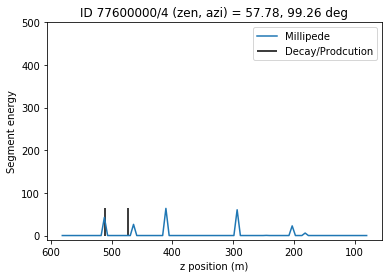

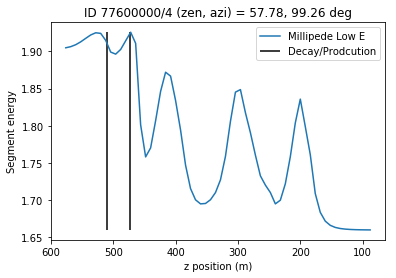

[azimuth => 5.14105,
decay_asymmetry => 0.976936,
fractional_energy => 0.999985,
interactions => 1,
length => 15.1257,
llp_energy => 114.011,
prod_x => 123.143,
prod_y => -322.286,
prod_z => 353.47,
zenith => 1.24603]
decay z = 348.6434560006053


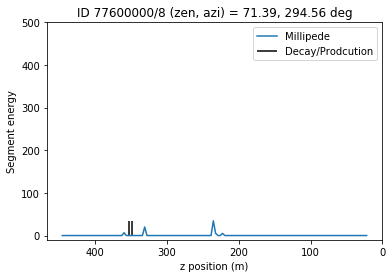

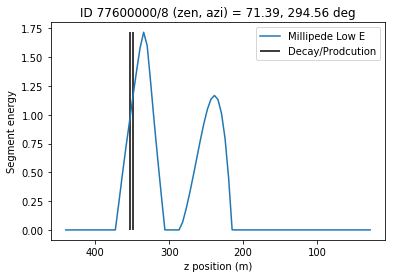

[azimuth => 6.06518,
decay_asymmetry => 0.686464,
fractional_energy => 0.990584,
interactions => 1,
length => 5.94355,
llp_energy => 52.1173,
prod_x => -270.248,
prod_y => 180.914,
prod_z => -96.3661,
zenith => 0.99605]
decay z = -99.59714942520432


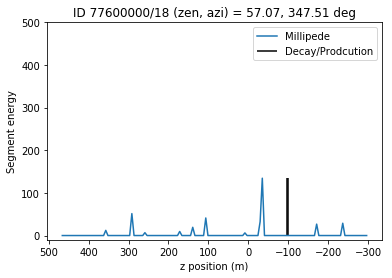

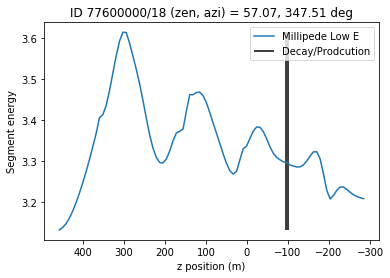

[azimuth => 3.99019,
decay_asymmetry => 0.855398,
fractional_energy => 0.9998,
interactions => 1,
length => 4.01363,
llp_energy => 51.124,
prod_x => 3.41049,
prod_y => 108.809,
prod_z => 207.945,
zenith => 0.661091]
decay z = 204.7772421655166


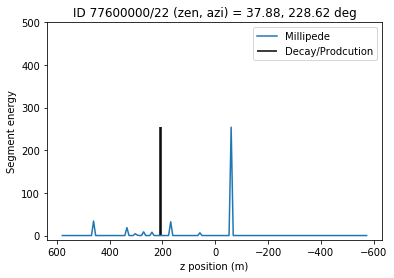

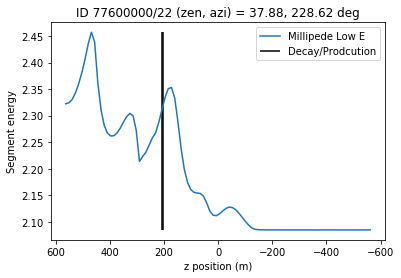

[azimuth => 4.4966,
decay_asymmetry => 0.751708,
fractional_energy => 0.992762,
interactions => 1,
length => 26.8418,
llp_energy => 171.588,
prod_x => -236.426,
prod_y => -270.884,
prod_z => 49.0571,
zenith => 0.958827]
decay z = 33.63697754325001


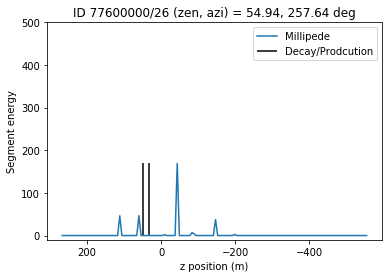

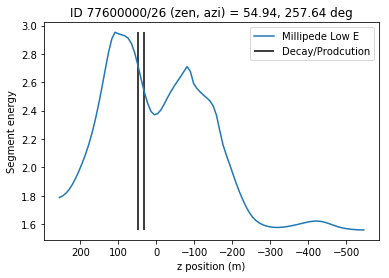

[azimuth => 0.582563,
decay_asymmetry => 0.98733,
fractional_energy => 0.99406,
interactions => 1,
length => 54.3837,
llp_energy => 1070.4,
prod_x => 188.911,
prod_y => 234.941,
prod_z => 392.476,
zenith => 0.994203]
decay z = 362.82779416636646


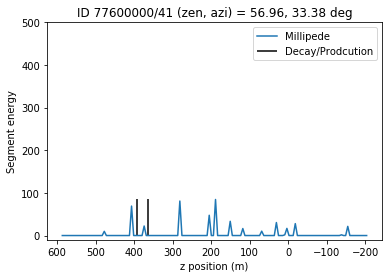

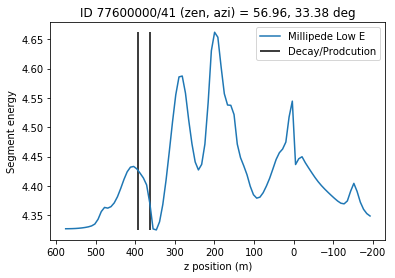

[azimuth => 6.26883,
decay_asymmetry => 0.861032,
fractional_energy => 0.942196,
interactions => 1,
length => 380.955,
llp_energy => 2346.05,
prod_x => 516.264,
prod_y => 17.2844,
prod_z => 552.329,
zenith => 1.07168]
decay z = 369.9859884916146


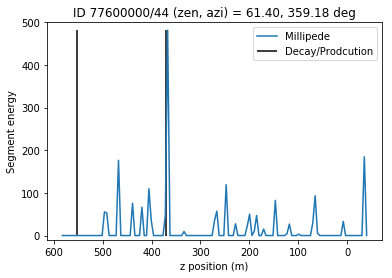

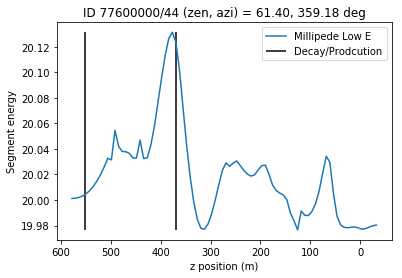

[azimuth => 1.47746,
decay_asymmetry => 0.673418,
fractional_energy => 0.995149,
interactions => 1,
length => 72.1085,
llp_energy => 330.406,
prod_x => -129.856,
prod_y => -451.02,
prod_z => -98.2755,
zenith => 0.377605]
decay z = -165.30397284739487


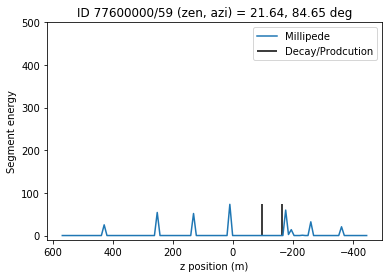

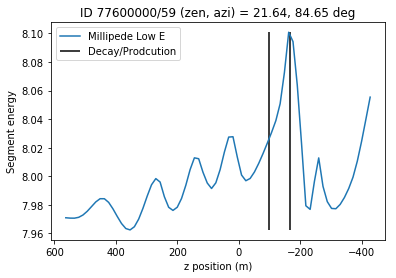

[azimuth => 3.44341,
decay_asymmetry => 0.682445,
fractional_energy => 0.969836,
interactions => 1,
length => 15.3998,
llp_energy => 298.753,
prod_x => 404.604,
prod_y => -91.0578,
prod_z => 96.5332,
zenith => 0.358389]
decay z = 82.11178266521573


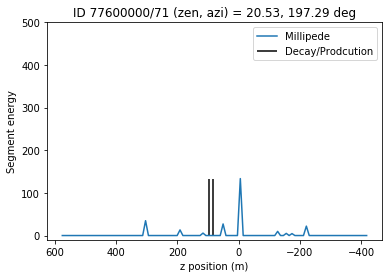

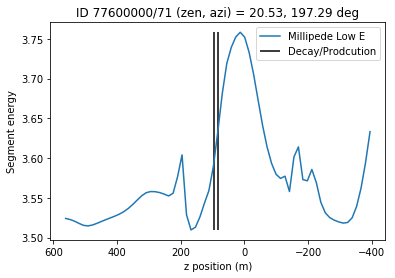

[azimuth => 1.42827,
decay_asymmetry => 0.95499,
fractional_energy => 0.999225,
interactions => 1,
length => 33.8651,
llp_energy => 711.335,
prod_x => -137.655,
prod_y => 242.084,
prod_z => 291.704,
zenith => 0.315569]
decay z = 259.51084829446097


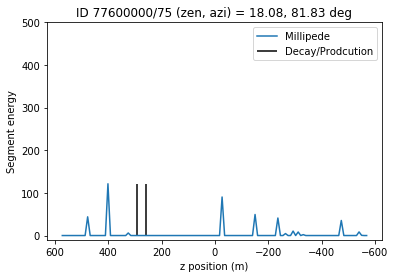

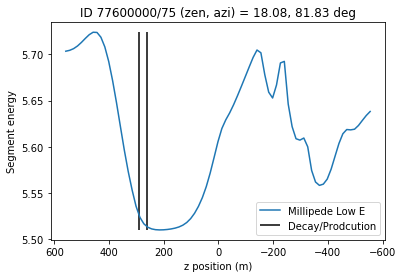

[azimuth => 3.55576,
decay_asymmetry => 0.886607,
fractional_energy => 0.962567,
interactions => 1,
length => 55.495,
llp_energy => 312.393,
prod_x => 320.017,
prod_y => 263.774,
prod_z => 126.353,
zenith => 1.08738]
decay z = 100.55834936753955


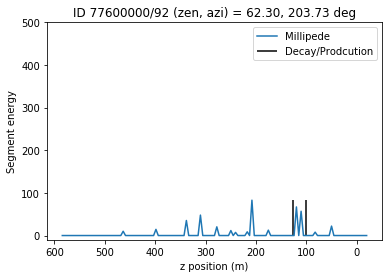

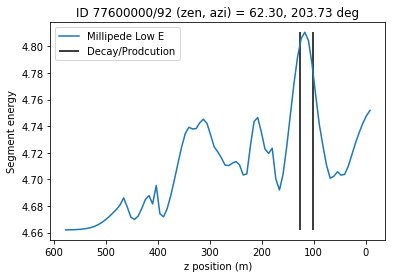

[azimuth => 1.28595,
decay_asymmetry => 0.889594,
fractional_energy => 0.885435,
interactions => 1,
length => 43.2016,
llp_energy => 335.456,
prod_x => 198,
prod_y => 69.6837,
prod_z => 551.371,
zenith => 0.262646]
decay z = 509.65062664584485


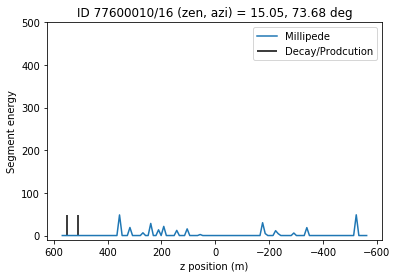

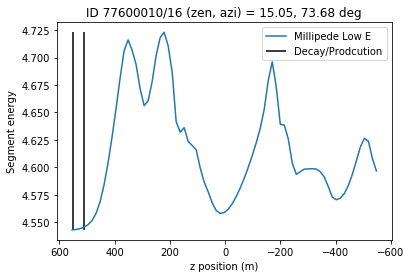

[azimuth => 3.44827,
decay_asymmetry => 0.75365,
fractional_energy => 0.999912,
interactions => 1,
length => 475.082,
llp_energy => 1808.72,
prod_x => -529.414,
prod_y => -207.842,
prod_z => 387.115,
zenith => 0.678704]
decay z = 17.317954519681905


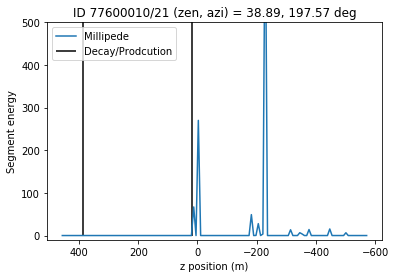

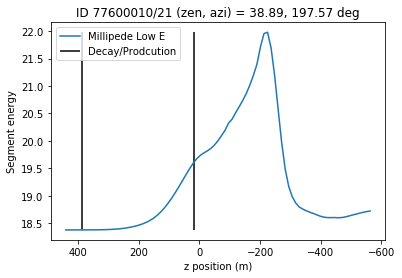

[azimuth => 0.145563,
decay_asymmetry => 0.79145,
fractional_energy => 0.998479,
interactions => 1,
length => 40.9036,
llp_energy => 223.82,
prod_x => -358.476,
prod_y => 101.89,
prod_z => -233.508,
zenith => 0.486611]
decay z = -269.6635356399677


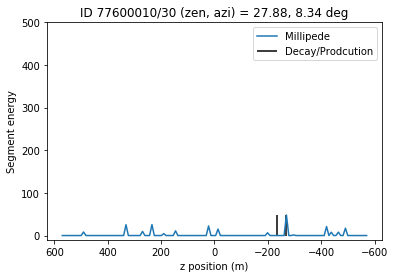

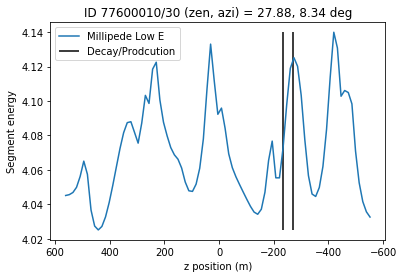

[azimuth => 0.330651,
decay_asymmetry => 0.738739,
fractional_energy => 0.99118,
interactions => 1,
length => 165.389,
llp_energy => 151.622,
prod_x => -92.6003,
prod_y => 221.613,
prod_z => -29.7866,
zenith => 0.362707]
decay z = -184.41535755138386


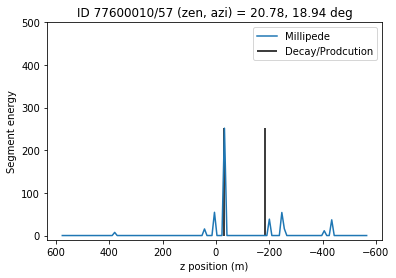

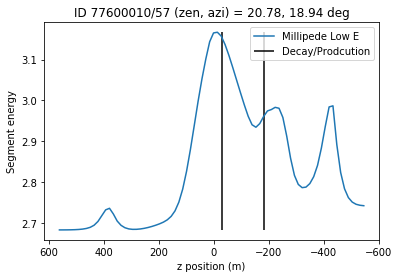

[azimuth => 3.92983,
decay_asymmetry => 0.681655,
fractional_energy => 0.957814,
interactions => 1,
length => 13.8096,
llp_energy => 288.347,
prod_x => -210.904,
prod_y => -435.511,
prod_z => -108.411,
zenith => 1.23785]
decay z = -112.92410160937142


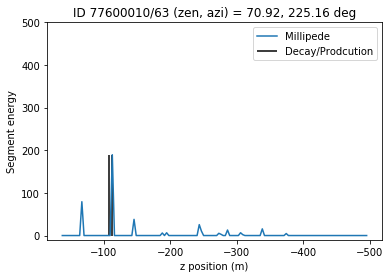

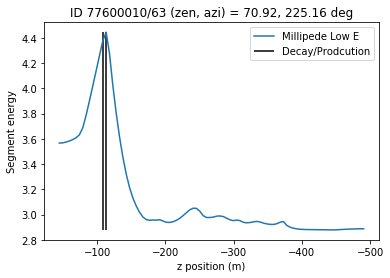

[azimuth => 3.19034,
decay_asymmetry => 0.874174,
fractional_energy => 0.99695,
interactions => 1,
length => 5.5547,
llp_energy => 90.0765,
prod_x => 38.9163,
prod_y => -46.3905,
prod_z => 90.5561,
zenith => 0.49146]
decay z = 85.65878603001178


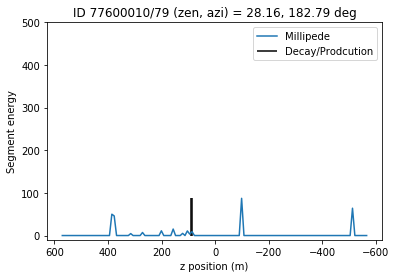

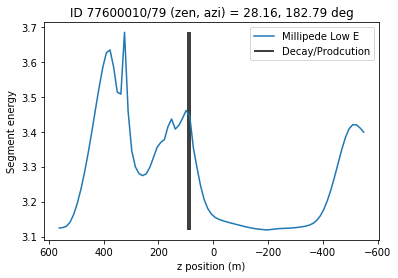

[azimuth => 3.50417,
decay_asymmetry => 0.906169,
fractional_energy => 0.998161,
interactions => 1,
length => 506.015,
llp_energy => 517.457,
prod_x => -19.0536,
prod_y => 120.109,
prod_z => 553.009,
zenith => 0.466035]
decay z = 100.95658892058901


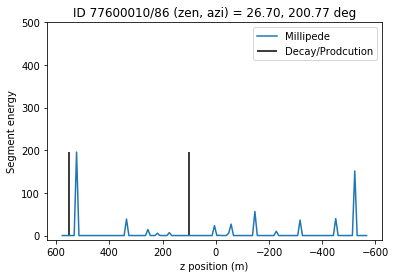

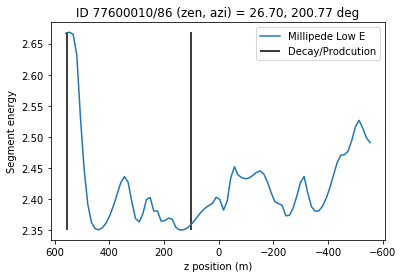

[azimuth => 3.49045,
decay_asymmetry => 0.892187,
fractional_energy => 0.999826,
interactions => 1,
length => 0.153619,
llp_energy => 239.883,
prod_x => -211.599,
prod_y => -324.114,
prod_z => 488.405,
zenith => 1.19359]
decay z = 488.3488643898781


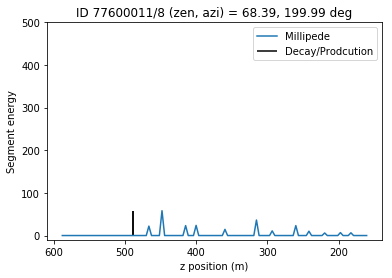

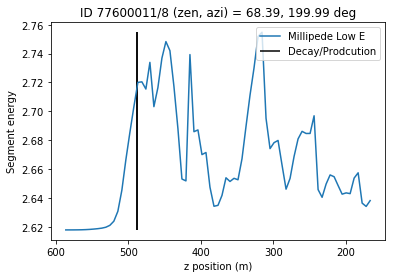

[azimuth => 3.23555,
decay_asymmetry => 0.852465,
fractional_energy => 0.998032,
interactions => 1,
length => 43.8486,
llp_energy => 157.97,
prod_x => -116.877,
prod_y => 386.628,
prod_z => 113.371,
zenith => 0.214905]
decay z = 70.53131092275964


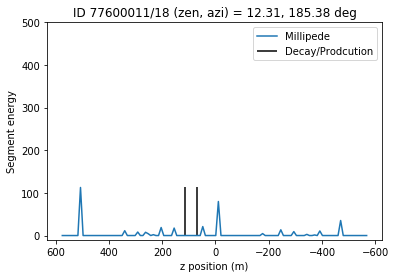

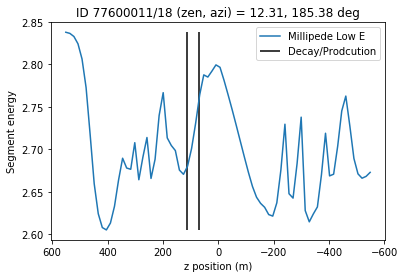

[azimuth => 5.36259,
decay_asymmetry => 0.915766,
fractional_energy => 0.929433,
interactions => 1,
length => 45.4755,
llp_energy => 201.599,
prod_x => -0.916898,
prod_y => -117.563,
prod_z => 151.505,
zenith => 0.665054]
decay z = 115.72130117075758


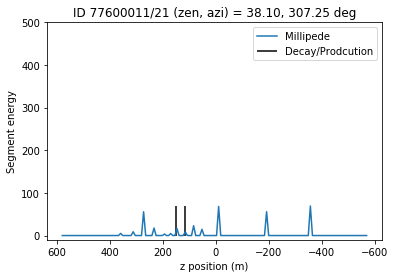

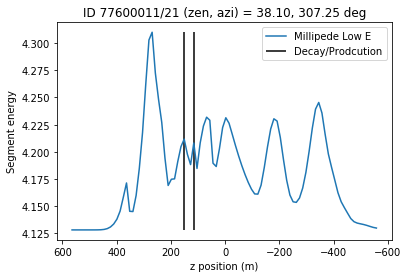

[azimuth => 2.5008,
decay_asymmetry => 0.988136,
fractional_energy => 0.995498,
interactions => 1,
length => 6.11956,
llp_energy => 35.8841,
prod_x => -240.162,
prod_y => -63.7074,
prod_z => 396.428,
zenith => 0.0905959]
decay z = 390.33397005653654


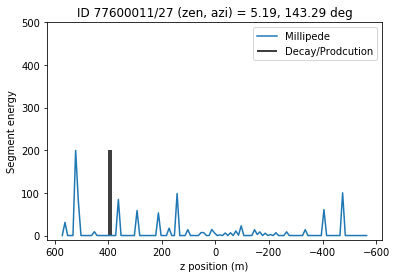

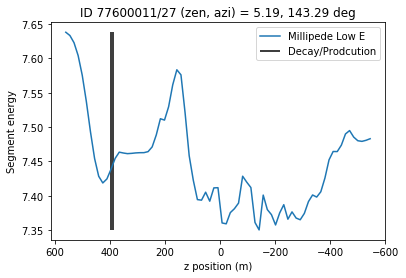

[azimuth => 1.0799,
decay_asymmetry => 0.951657,
fractional_energy => 0.993728,
interactions => 1,
length => 19.7225,
llp_energy => 159.029,
prod_x => 295.421,
prod_y => 304.56,
prod_z => -200.723,
zenith => 1.00076]
decay z = -211.36689778669316


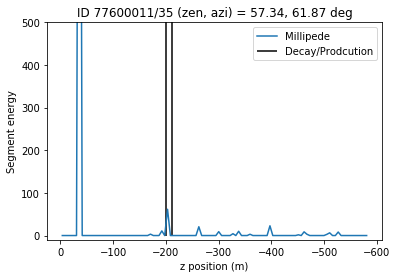

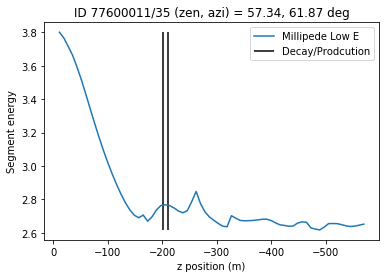

[azimuth => 1.65476,
decay_asymmetry => 0.916496,
fractional_energy => 0.998856,
interactions => 1,
length => 70.5467,
llp_energy => 276.423,
prod_x => 348.133,
prod_y => 359.152,
prod_z => 459.336,
zenith => 0.194314]
decay z = 390.1173309991785


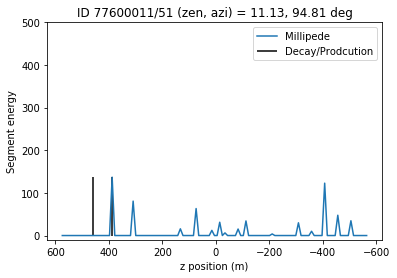

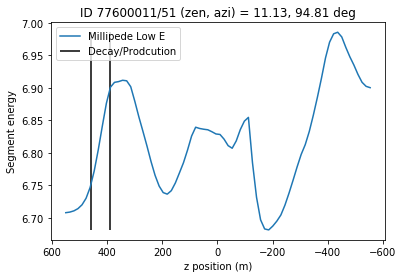

[azimuth => 3.74703,
decay_asymmetry => 0.930877,
fractional_energy => 0.998132,
interactions => 1,
length => 42.3843,
llp_energy => 239.944,
prod_x => -229.679,
prod_y => -323.256,
prod_z => 316.529,
zenith => 0.761598]
decay z = 285.8539767116569


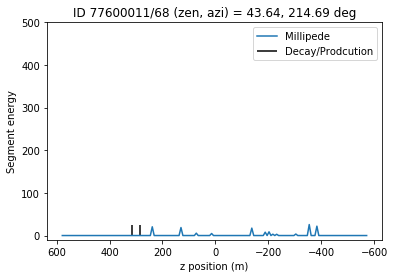

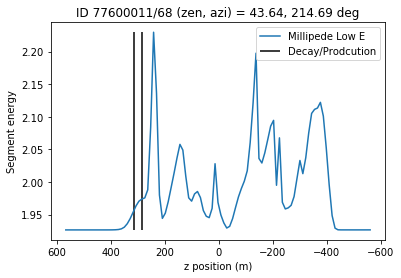

[azimuth => 0.744903,
decay_asymmetry => 0.702938,
fractional_energy => 0.996722,
interactions => 1,
length => 24.9374,
llp_energy => 327.078,
prod_x => -166.826,
prod_y => -267.066,
prod_z => 103.242,
zenith => 0.345111]
decay z = 79.77456161466863


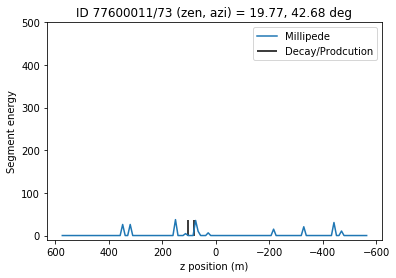

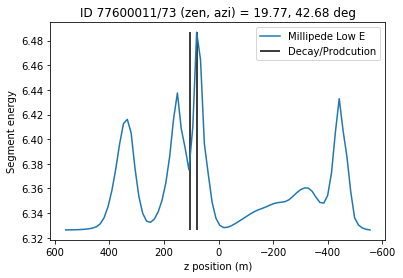

[azimuth => 2.31016,
decay_asymmetry => 0.694883,
fractional_energy => 0.932228,
interactions => 1,
length => 18.4785,
llp_energy => 249.659,
prod_x => -286.237,
prod_y => -31.0421,
prod_z => -145.593,
zenith => 1.23289]
decay z = -151.71900543629485


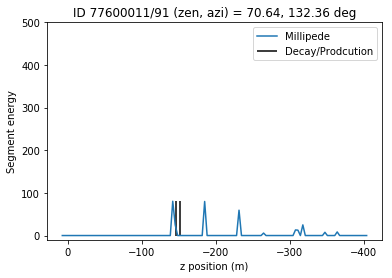

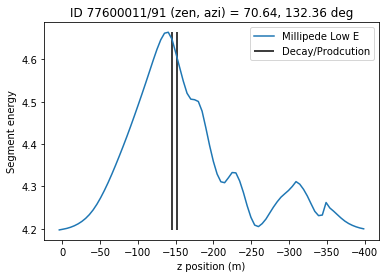

[azimuth => 5.9204,
decay_asymmetry => 0.927444,
fractional_energy => 0.964395,
interactions => 1,
length => 0.874806,
llp_energy => 132.11,
prod_x => -373.244,
prod_y => 142.727,
prod_z => 133.042,
zenith => 0.249174]
decay z = 132.19427710303


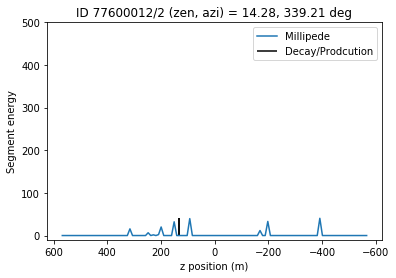

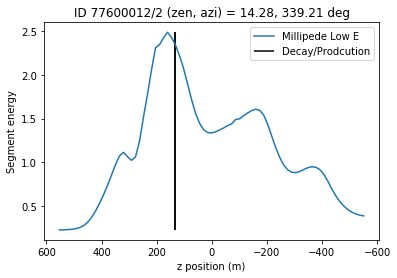

[azimuth => 3.94579,
decay_asymmetry => 0.680267,
fractional_energy => 0.980611,
interactions => 1,
length => 1.59518,
llp_energy => 26.0112,
prod_x => -245.644,
prod_y => 109.488,
prod_z => -165.11,
zenith => 0.581635]
decay z = -166.44335767334002


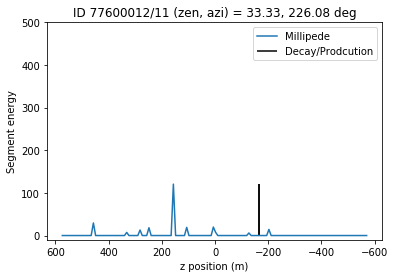

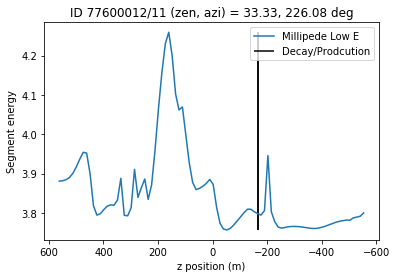

[azimuth => 6.21157,
decay_asymmetry => 0.768289,
fractional_energy => 0.999979,
interactions => 1,
length => 88.6807,
llp_energy => 895.739,
prod_x => 77.6649,
prod_y => 151.472,
prod_z => 166.514,
zenith => 1.07598]
decay z = 124.4027195110821


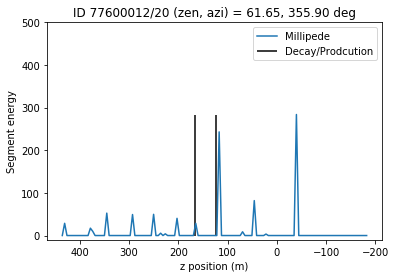

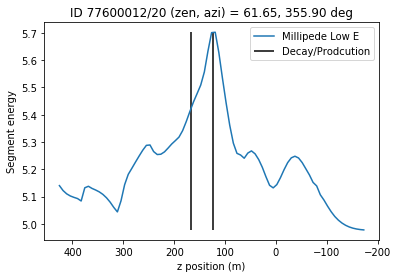

In [4]:
#filename = "/data/user/axelpo/LLP-data/DarkLeptonicScalar.mass-130.eps-5e-6.nevents-5000_macrogaps_230926.196961869/L2_millipede.i3.gz"
#filename = "test_millipede.i3"
#filename = "/data/user/axelpo/LLP-data/NO_LLP.DarkLeptonicScalar.mass-130.eps-5e-6.nevents-5000_230919.196721202/L2_millipede.i3.gz"
filename = "/data/user/axelpo/LLP-data/DarkLeptonicScalar.mass-130.eps-5e-6.nevents-5000_naturalrate_230919.196721196/L2_millipede.i3"
tray = I3Tray()
tray.Add("I3Reader", filename=filename)
tray.Add(PlotMillipede)
tray.Execute()
